# Project Titanic


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#limitations'>Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset captures information on the people who travelled on the RMS Titanic. This dataset has be taken from the Kaggle Competition - https://www.kaggle.com/c/titanic

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [3]:
# Use this cell to set up import statements for all of the packages that you plan to use.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

<a id='wrangling'></a>
## Data Wrangling

### 1. General Properties
#### 1.1 Load the data
Load both the training and testing csv file into a dataframe using pandas

In [27]:
titanicTrain = pd.read_csv('train.csv')
display(titanicTrain.head())

titanicTest = pd.read_csv('test.csv')
display(titanicTest.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 1.2 Check contents of columns

Here we check the unique values in each columns to understand more about the data. Also we will check for the data types missing vales, mean, count etc.

In [3]:
print("Survived :  {}".format(titanicTrain.Survived.unique()))
print("Pclass :  {}".format(titanicTrain.Pclass.unique()))
#print("Name :  {}".format(titanicTrain.Name.unique()))
print("Sex :  {}".format(titanicTrain.Sex.unique()))
print("Age :  {}".format(titanicTrain.Age.unique()))
print("SibSp :  {}".format(titanicTrain.SibSp.unique()))
print("Parch :  {}".format(titanicTrain.Parch.unique()))
#print("Ticket :  {}".format(titanicTrain.Ticket.unique()))
print("Fare :  {}".format(titanicTrain.Fare.unique()))
#print("Cabin :  {}".format(titanicTrain.Cabin.unique()))
print("Embarked :  {}".format(titanicTrain.Embarked.unique()))
#print("PassengerId :  {}".format(titanicTrain.PassengerId.unique()))

Survived :  [0 1]
Pclass :  [3 1 2]
Sex :  ['male' 'female']
Age :  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp :  [1 0 3 4 2 5 8]
Parch :  [0 1 2 5 3 4 6]
Fare :  [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792

In [4]:
# Find count, mean etc
print(titanicTrain.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# DataTypes and null columns
print("Train DataTypes : \n")
print(titanicTrain.info())

print("\n\nTest DataTypes : \n")
print(titanicTest.info())

Train DataTypes : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Test DataTypes : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

#### 1.3 Effect of each feature on Survival
Here we will plot graph of count of people who survived and died  for each feature.

- Pclass : It is pretty evident that people travelled in 1st class had higher chance of survival compared to lower class.
- Sex  : Females had a higher chance of survival than men

In [7]:
def barchart(indf, incolumn) : 
    dlt = []
    ilt = []
    for element in indf[incolumn].unique() : 
        x = indf[indf[incolumn] == element]['Survived'].value_counts()
        dlt.append(x)
        ilt.append(element)
    df1 = pd.DataFrame(dlt)
    df1.index = ilt
    df1.columns = ['Dead', 'Survived']
    df1.plot(kind='bar',stacked=False, figsize=(10,3), logy=True)

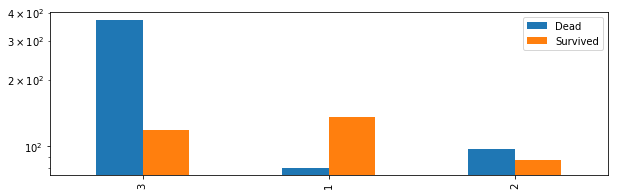

In [8]:
barchart(titanicTrain, 'Pclass')

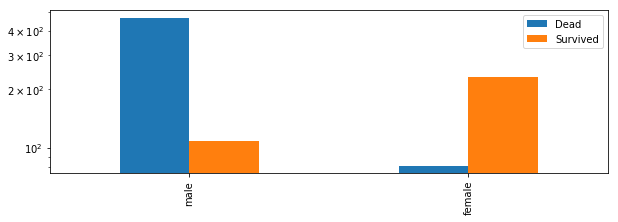

In [9]:
barchart(titanicTrain, 'Sex')

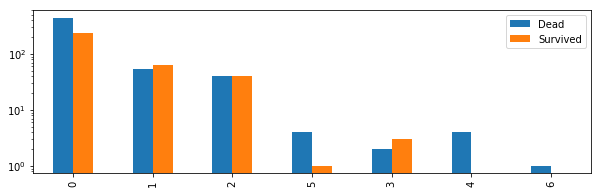

In [10]:
barchart(titanicTrain, 'Parch')

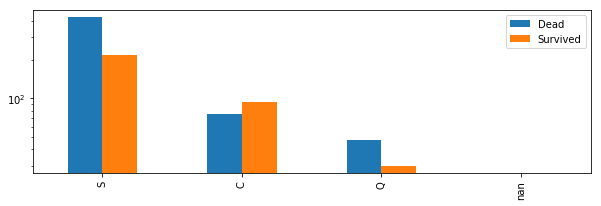

In [11]:
barchart(titanicTrain, 'Embarked')

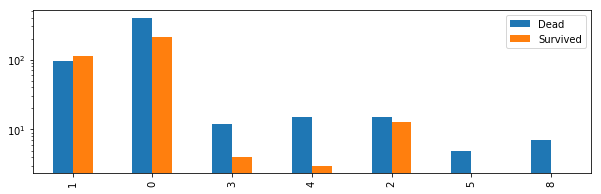

In [12]:
barchart(titanicTrain, 'SibSp')

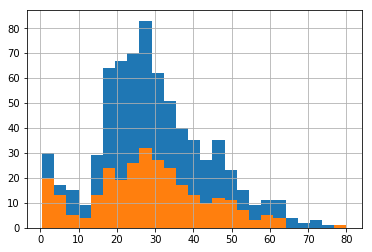

In [16]:
ax = titanicTrain['Age'].hist(bins = 25)
ax1 = titanicTrain[titanicTrain.Survived == 1]['Age'].hist(bins = 25)

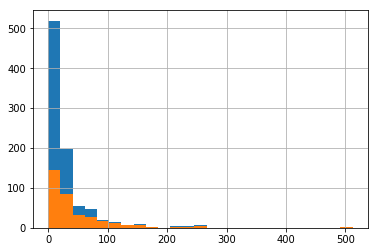

In [17]:
ax = titanicTrain['Fare'].hist(bins = 25)
ax1 = titanicTrain[titanicTrain.Survived == 1]['Fare'].hist(bins = 25)

#### 1.3 Check Null Value Counts
Here we check the count of null(nan) values in each column of training set.
- 177 null values for Age.
- 2 in Embarked 
- 687 for cabin.


In [18]:
titanicTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we check the count of null(nan) values in each column of testing set.
- 86 null values for Age.
- 1 null in Fare.
- 327 null in Cabin.

In [19]:
titanicTest.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
#Insert column Survived
titanicTest.insert(1,'Survived',3)

#concatinate test and training set
combinedTitanic =  pd.concat([titanicTest, titanicTrain])
combinedTitanic.isnull().sum()

ValueError: cannot insert Survived, already exists

In [21]:
combinedTitanic.groupby('Embarked').count()['PassengerId']

# Replace missing values with the the most occuring value.
combinedTitanic['Embarked'] = combinedTitanic['Embarked'].fillna('S')

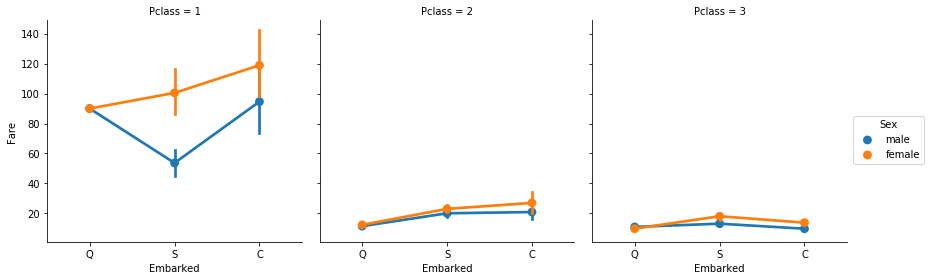

In [22]:
sns.factorplot(x="Embarked", hue="Sex", y="Fare", col="Pclass", data=combinedTitanic)

In [25]:
#Fare
display(combinedTitanic[combinedTitanic['Fare'].isnull()])
combinedTitanic["Fare"].fillna(combinedTitanic.groupby(['Pclass','Sex','Embarked'])["Fare"].transform("median"), inplace=True)
display(combinedTitanic[combinedTitanic['PassengerId'] == 1044 ])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S,Mr


In [24]:
#Age
combinedTitanic['Title']=combinedTitanic['Name'].str.extract('([A-Za-z]*\.)')

titleMap = {'Capt.': 'Crew', 'Col.': 'Crew', 'Dr.': 'Crew', 'Rev.': 'Crew',
'Countess.': 'Mrs', 'Dona.': 'Mrs', 'Lady.': 'Mrs', 'Mrs.': 'Mrs', 'Ms.' : 'Mrs',
'Don.': 'Mr', 'Jonkheer.': 'Mr', 'Major.': 'Mr', 'Mr.': 'Mr', 'Sir.' : 'Mr',
'Miss.': 'Miss', 'Mlle.': 'Miss', 'Mme.': 'Miss',
'Master.' : 'Master'}
combinedTitanic['Title'] = combinedTitanic['Title'].map(titleMap)
print(combinedTitanic.groupby('Title')['Age'].median())

combinedTitanic["Age"].fillna(combinedTitanic.groupby("Title")["Age"].transform("median"), inplace=True)


Title
Crew      49.5
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.5
Name: Age, dtype: float64


/home/neethu/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [15]:
combinedTitanic.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

### DataPreprocessing


In [16]:
#Remove columns that we  are not using
combinedTitanic = combinedTitanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
combinedTitanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,3,male,34.5,0,0,7.8292,Q,Mr
1,3,3,female,47.0,1,0,7.0000,S,Mrs
2,3,2,male,62.0,0,0,9.6875,Q,Mr
3,3,3,male,27.0,0,0,8.6625,S,Mr
4,3,3,female,22.0,1,1,12.2875,S,Mrs


In [17]:
# Do one-hoe encoding for all categorical variable
combinedTitanic['Pclass'] = combinedTitanic['Pclass'].map({1 : '1st Class', 2: '2nd Class', 3 : '3rd Class'})
combinedTitanicEncoded = pd.get_dummies(data =  combinedTitanic)
combinedTitanicEncoded.head()


,Survived,Age,SibSp,Parch,Fare,Pclass_1st Class,Pclass_2nd Class,Pclass_3rd Class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,0,0,1,0,1,0,1,0,0,0,0,1,0
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1,0,0,0,0,1
2,3,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0,0,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0,0,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1,0,0,0,0,1


In [18]:
#Normalize all the Numeric variables:
#from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numericCol = ['Age','SibSp','Parch','Fare']
combinedTitanicEncoded[numericCol] = scaler.fit_transform(combinedTitanicEncoded[numericCol] )


combinedTitanicEncoded.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1st Class,Pclass_2nd Class,Pclass_3rd Class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,0.430039,0.000,0.000000,0.015282,0,0,1,0,1,0,1,0,0,0,0,1,0
1,3,0.586622,0.125,0.000000,0.013663,0,0,1,1,0,0,0,1,0,0,0,0,1
2,3,0.774521,0.000,0.000000,0.018909,0,1,0,0,1,0,1,0,0,0,0,1,0
3,3,0.336089,0.000,0.000000,0.016908,0,0,1,0,1,0,0,1,0,0,0,1,0
4,3,0.273456,0.125,0.111111,0.023984,0,0,1,1,0,0,0,1,0,0,0,0,1


### Modeling

In [19]:
testFeatures = (combinedTitanicEncoded[combinedTitanicEncoded['Survived'] == 3 ]).drop('Survived',axis = 1)
trainFeatures = (combinedTitanicEncoded[combinedTitanicEncoded['Survived'] != 3 ]).drop('Survived',axis = 1)
trainlabel = combinedTitanicEncoded[combinedTitanicEncoded['Survived'] != 3 ]['Survived']

print("Test count : {}\n".format(len(testFeatures.index) ))
print("Train features count : {}\n".format(len(trainFeatures.index) ))
print("Train Label : {}\n".format(len(trainlabel.index) ))


Test count : 418

Train features count : 891

Train Label : 891



In [20]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(trainFeatures, trainlabel)
pred = clf.predict(testFeatures)
print(pred)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [23]:
TestOut = titanicTest
TestOut['Survived'] = pred
TestOutput = TestOut[['PassengerId','Survived']]
print(TestOutput)
TestOutput.to_csv('Titanic.csv',index = False)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         1
21           913         1
22           914         1
23           915         1
24           916         0
25           917         0
26           918         1
27           919         1
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3